In [71]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import standardize_numeric

In [72]:
df = pd.read_csv('data/UTKFaceAugmented.csv')
print(len(df))
df.head(5)

23708


,Unnamed: 0,filename,age,gender,race,age_range,num_haircuts_life,has_tiktok,remembers_disco,uses_skincare,max_annual_earnings
0,0,100_0_0_20170112213500903.jpg.chip.jpg,100,male,white,100-119,360,no,no,no,32890.160162
1,1,100_0_0_20170112215240346.jpg.chip.jpg,100,male,white,100-119,627,no,no,no,29870.803247
2,2,100_1_0_20170110183726390.jpg.chip.jpg,100,female,white,100-119,687,no,yes,no,62930.622654
3,3,100_1_0_20170112213001988.jpg.chip.jpg,100,female,white,100-119,710,no,no,no,31105.957009
4,4,100_1_0_20170112213303693.jpg.chip.jpg,100,female,white,100-119,614,no,no,no,63977.673549


In [73]:
df = df.drop('race', axis=1)
df = df.drop('gender', axis=1)
df = df.drop('age_range', axis=1)



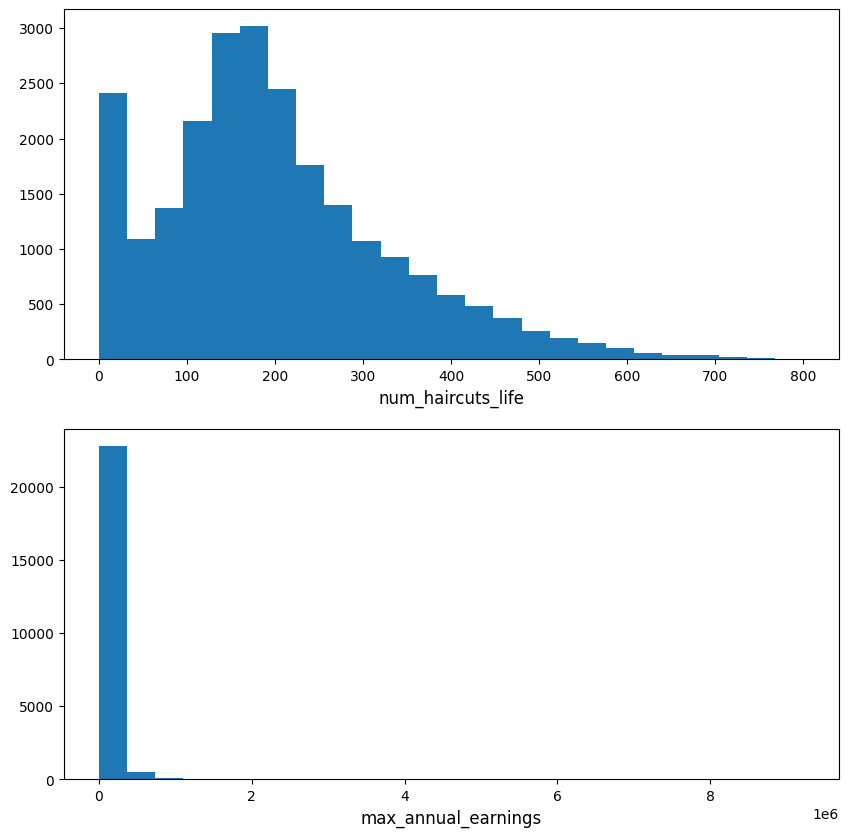

In [74]:
numeric_columns = ["num_haircuts_life","max_annual_earnings"]
fig, axs = plt.subplots(2,1, figsize=(10,10))
for i in range(2):
    axs[i].hist(df[numeric_columns[i]], bins = 25)
    axs[i].set_xlabel(numeric_columns[i], fontsize = 12)

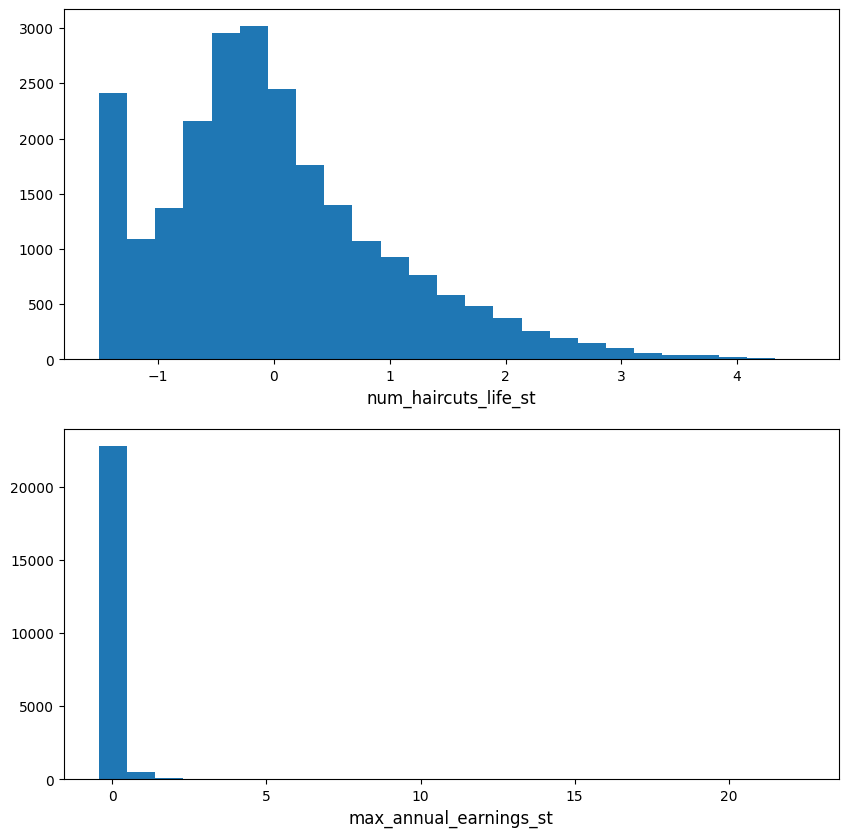

In [75]:

df['num_haircuts_life_st'] = standardize_numeric(df['num_haircuts_life'], False)
df['max_annual_earnings_st'] = standardize_numeric(df['max_annual_earnings'], False)
numeric_columns = ["num_haircuts_life_st", "max_annual_earnings_st"]
fig, axs = plt.subplots(2,1, figsize=(10,10))
for i in range(2):
    axs[i].hist(df[numeric_columns[i]], bins = 25)
    axs[i].set_xlabel(numeric_columns[i], fontsize = 12)

In [76]:
print(df.dtypes)

Unnamed: 0                  int64
filename                   object
age                         int64
num_haircuts_life           int64
has_tiktok                 object
remembers_disco            object
uses_skincare              object
max_annual_earnings       float64
num_haircuts_life_st      float64
max_annual_earnings_st    float64
dtype: object


In [77]:
keep_categoric_columns = ["has_tiktok","remembers_disco","uses_skincare"]
for col in keep_categoric_columns:
    df = df.join(pd.get_dummies(df[col], dtype='int'), how = 'outer', rsuffix=col)
df.head(10)

,Unnamed: 0,filename,age,num_haircuts_life,has_tiktok,remembers_disco,uses_skincare,max_annual_earnings,num_haircuts_life_st,max_annual_earnings_st,no,yes,noremembers_disco,yesremembers_disco,nouses_skincare,yesuses_skincare
0,0,100_0_0_20170112213500903.jpg.chip.jpg,100,360,no,no,no,32890.160162,1.225473,-0.353687,1,0,1,0,1,0
1,1,100_0_0_20170112215240346.jpg.chip.jpg,100,627,no,no,no,29870.803247,3.256254,-0.361172,1,0,1,0,1,0
2,2,100_1_0_20170110183726390.jpg.chip.jpg,100,687,no,yes,no,62930.622654,3.712609,-0.279210,1,0,0,1,1,0
3,3,100_1_0_20170112213001988.jpg.chip.jpg,100,710,no,no,no,31105.957009,3.887545,-0.358110,1,0,1,0,1,0
4,4,100_1_0_20170112213303693.jpg.chip.jpg,100,614,no,no,no,63977.673549,3.157377,-0.276614,1,0,1,0,1,0
5,5,100_1_0_20170112215032192.jpg.chip.jpg,100,427,no,no,no,37422.839290,1.735070,-0.342449,1,0,1,0,1,0
6,6,100_1_0_20170117195420803.jpg.chip.jpg,100,568,no,yes,no,53988.009196,2.807504,-0.301381,1,0,0,1,1,0
7,7,100_1_0_20170119212053665.jpg.chip.jpg,100,766,no,no,no,41449.094825,4.313477,-0.332467,1,0,1,0,1,0
8,8,100_1_2_20170105174847679.jpg.chip.jpg,100,527,no,no,no,42429.537615,2.495662,-0.330037,1,0,1,0,1,0
9,9,100_1_2_20170112213615815.jpg.chip.jpg,100,354,no,no,no,48179.281854,1.179837,-0.315782,1,0,1,0,1,0


In [78]:
features = ["num_haircuts_life_st", "max_annual_earnings_st","no", "yes", "noremembers_disco",	"yesremembers_disco","nouses_skincare", "yesuses_skincare"]
features2 = ["filename", "num_haircuts_life_st", "max_annual_earnings_st","no", "yes", "noremembers_disco",	"yesremembers_disco","nouses_skincare", "yesuses_skincare"]
target = ["age"]
train_df = df[features + target]
train_df2 = df[features2 + target]
for filename in train_df2['filename']:
    filename = str(filename)
print(train_df2['filename'])

0        100_0_0_20170112213500903.jpg.chip.jpg
1        100_0_0_20170112215240346.jpg.chip.jpg
2        100_1_0_20170110183726390.jpg.chip.jpg
3        100_1_0_20170112213001988.jpg.chip.jpg
4        100_1_0_20170112213303693.jpg.chip.jpg
                          ...                  
23703      9_1_3_20161220222856346.jpg.chip.jpg
23704      9_1_3_20170104222949455.jpg.chip.jpg
23705      9_1_4_20170103200637399.jpg.chip.jpg
23706      9_1_4_20170103200814791.jpg.chip.jpg
23707      9_1_4_20170103213057382.jpg.chip.jpg
Name: filename, Length: 23708, dtype: object


In [84]:
print(train_df['age'].value_counts())
print(train_df['yes'].value_counts())
print(train_df['yesremembers_disco'].value_counts())
print(train_df['yesuses_skincare'].value_counts())

age
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
103       1
111       1
Name: count, Length: 104, dtype: int64
yes
0    18931
1     4777
Name: count, dtype: int64
yesremembers_disco
0    21095
1     2613
Name: count, dtype: int64
yesuses_skincare
0    16580
1     7128
Name: count, dtype: int64


In [80]:
from sklearn.model_selection import train_test_split

# split train and val
x_train, x_val, y_train, y_val = train_test_split(train_df[features], train_df[target], train_size=0.6)

# split again to get a test set
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, train_size=0.5)

print("x train: ",x_train.shape, "y train:", y_train.shape)
print("x val: ",x_val.shape, "y train:", y_val.shape)
print("x test: ",x_test.shape, "y test:", y_test.shape)
x_train2, x_val2, y_train2, y_val2 = train_test_split(train_df2[features2], train_df2[target], train_size=0.6)

# split again to get a test set
x_val2, x_test2, y_val2, y_test2 = train_test_split(x_val2, y_val2, train_size=0.5)

x train:  (14224, 8) y train: (14224, 1)
x val:  (4742, 8) y train: (4742, 1)
x test:  (4742, 8) y test: (4742, 1)


In [81]:
# dataframes -> numpy arrays -> tensors
print(x_train)
x_train, x_val, x_test = torch.Tensor(x_train.to_numpy()), torch.Tensor(x_val.to_numpy()), torch.Tensor(x_test.to_numpy())
y_train, y_val, y_test = torch.Tensor(y_train.to_numpy()), torch.Tensor(y_val.to_numpy()), torch.Tensor(y_test.to_numpy())


# store it in a dict that we can save out as a single file
data_dict = {'x_train':x_train, 'x_val':x_val, 'x_test':x_test, 'y_train':y_train, 'y_val':y_val, 'y_test':y_test}
data_dict2 = {'x_train':x_train2, 'x_val':x_val2, 'x_test':x_test2, 'y_train':y_train2, 'y_val':y_val2, 'y_test':y_test2}
# save it to local data directory
torch.save(data_dict, 'processed_features.pt')
torch.save(data_dict2, 'processed_features2.pt')

       num_haircuts_life_st  max_annual_earnings_st  no  yes  \
18352              1.377591               -0.022314   1    0   
7008               0.000920               -0.104634   1    0   
6943              -0.645583               -0.048207   1    0   
13970             -0.029504                0.021040   1    0   
15388              0.267127                0.383490   1    0   
...                     ...                     ...  ..  ...   
22919              3.377948               -0.089014   1    0   
21458              1.986065               -0.306119   1    0   
9366              -0.333741               -0.007909   0    1   
4649              -0.394588               -0.115088   1    0   
10876             -0.501071               -0.110305   1    0   

       noremembers_disco  yesremembers_disco  nouses_skincare  \
18352                  0                   1                1   
7008                   1                   0                1   
6943                   1            